In [123]:
#All figures are saved to the folder "figures"
#Imports
import pandas as pd
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
from importlib import reload

In [124]:
#Load scores and rename the columns
scores = pd.DataFrame(pd.read_csv("knapsacksolver/scores/par10_scores.csv", header=0, index_col=0))
scores = scores.rename(columns={"dynamic_programming_bellman_array":"dynamic_programming", "branch_and_bound_sort": "branch_and_bound"})

In [125]:
#Calculation of SBS and VBS

#Add a columns for the minimum value of the three algorithms
scores["best_solver"] = scores.min(axis=1)

#Calculate the average scores of the algorithms and the average of the best solver (VBS)
average_greedy, average_dynamic_programming, average_branch_and_bound, average_best_solver = scores.mean(axis=0)

#The algorithm with the lowest average score represents the single best solver (SBS)
average_single_best_solver = min(average_greedy, average_dynamic_programming, average_branch_and_bound)

#Output the scores
print("Average time of Greedy Algorithm: " + str(average_greedy))
print("Average time of Dynamic Programming Algorithm: " + str(average_dynamic_programming))
print("Average time Branch and Bound Algorithm: " + str(average_branch_and_bound))
print("Average time of Single Best Solver (Branch and Bound): " + str(average_single_best_solver))
print("Average time of Virtual Best Solver: " + str(average_best_solver))

#Add a column that contains the name of the algorithm that performed best (necessary for the classification task)
#With equal scores, the first column is selected and therefore, the column of the VBS is not considered
scores["best_algorithm"] = scores.idxmin(axis=1)

Average time of Greedy Algorithm: 36633.00646945813
Average time of Dynamic Programming Algorithm: 34098.02912955665
Average time Branch and Bound Algorithm: 8569.46375418719
Average time of Single Best Solver (Branch and Bound): 8569.46375418719
Average time of Virtual Best Solver: 5878.964753694581


In [126]:
#Amount of solved instances
count_solved = scores.apply(lambda x: x[x != 50000].count()) #50,000 is the scores used to punish unsolved instances

#Output the result
print(count_solved)

greedy                  5427
dynamic_programming     7815
branch_and_bound       17828
best_solver            18633
best_algorithm         20300
dtype: int64


In [130]:
#Calculate the percentage of solved instances
print(18633/20300)

0.9178817733990148


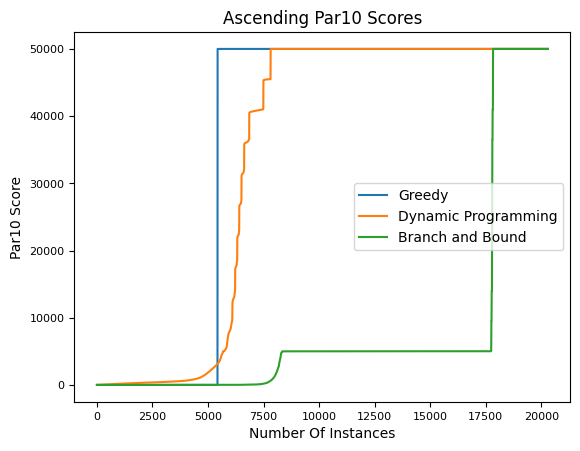

In [122]:
#Generation of first graph considering all 20,300 instances

#Seperating the the algorithms to sort them individually. Additionally, the index is removed
greedy = pd.DataFrame(scores["greedy"])
greedy = greedy.sort_values("greedy", ascending=True)
greedy = greedy.reset_index(drop=True)
dynamic_programming = pd.DataFrame(scores["dynamic_programming"])
dynamic_programming = dynamic_programming.sort_values("dynamic_programming", ascending=True)
dynamic_programming = dynamic_programming.reset_index(drop=True)
branch_and_bound = pd.DataFrame(scores["branch_and_bound"])
branch_and_bound = branch_and_bound.sort_values("branch_and_bound", ascending=True)
branch_and_bound = branch_and_bound.reset_index(drop=True)

#Clear the plot
plt=reload(plt)

#Plot the three algorithms with one line each
plt.plot(greedy, label="Greedy")
plt.plot(dynamic_programming, label="Dynamic Programming")
plt.plot(branch_and_bound, label="Branch and Bound")

#Set title and labels
plt.xlabel("Number Of Instances", fontsize=10)
plt.ylabel("Par10 Score", fontsize=10)
plt.title("Ascending Par10 Scores", fontsize=12)

#Set font size for axis notations
plt.gca().tick_params(axis='both', which='major', labelsize=8)

#Show the legend
plt.legend()

#Increase the resolution and save the figure
plt.rcParams['savefig.dpi'] = 2000
plt.savefig("figures/ascending_par10_scores.png")
plt.show()

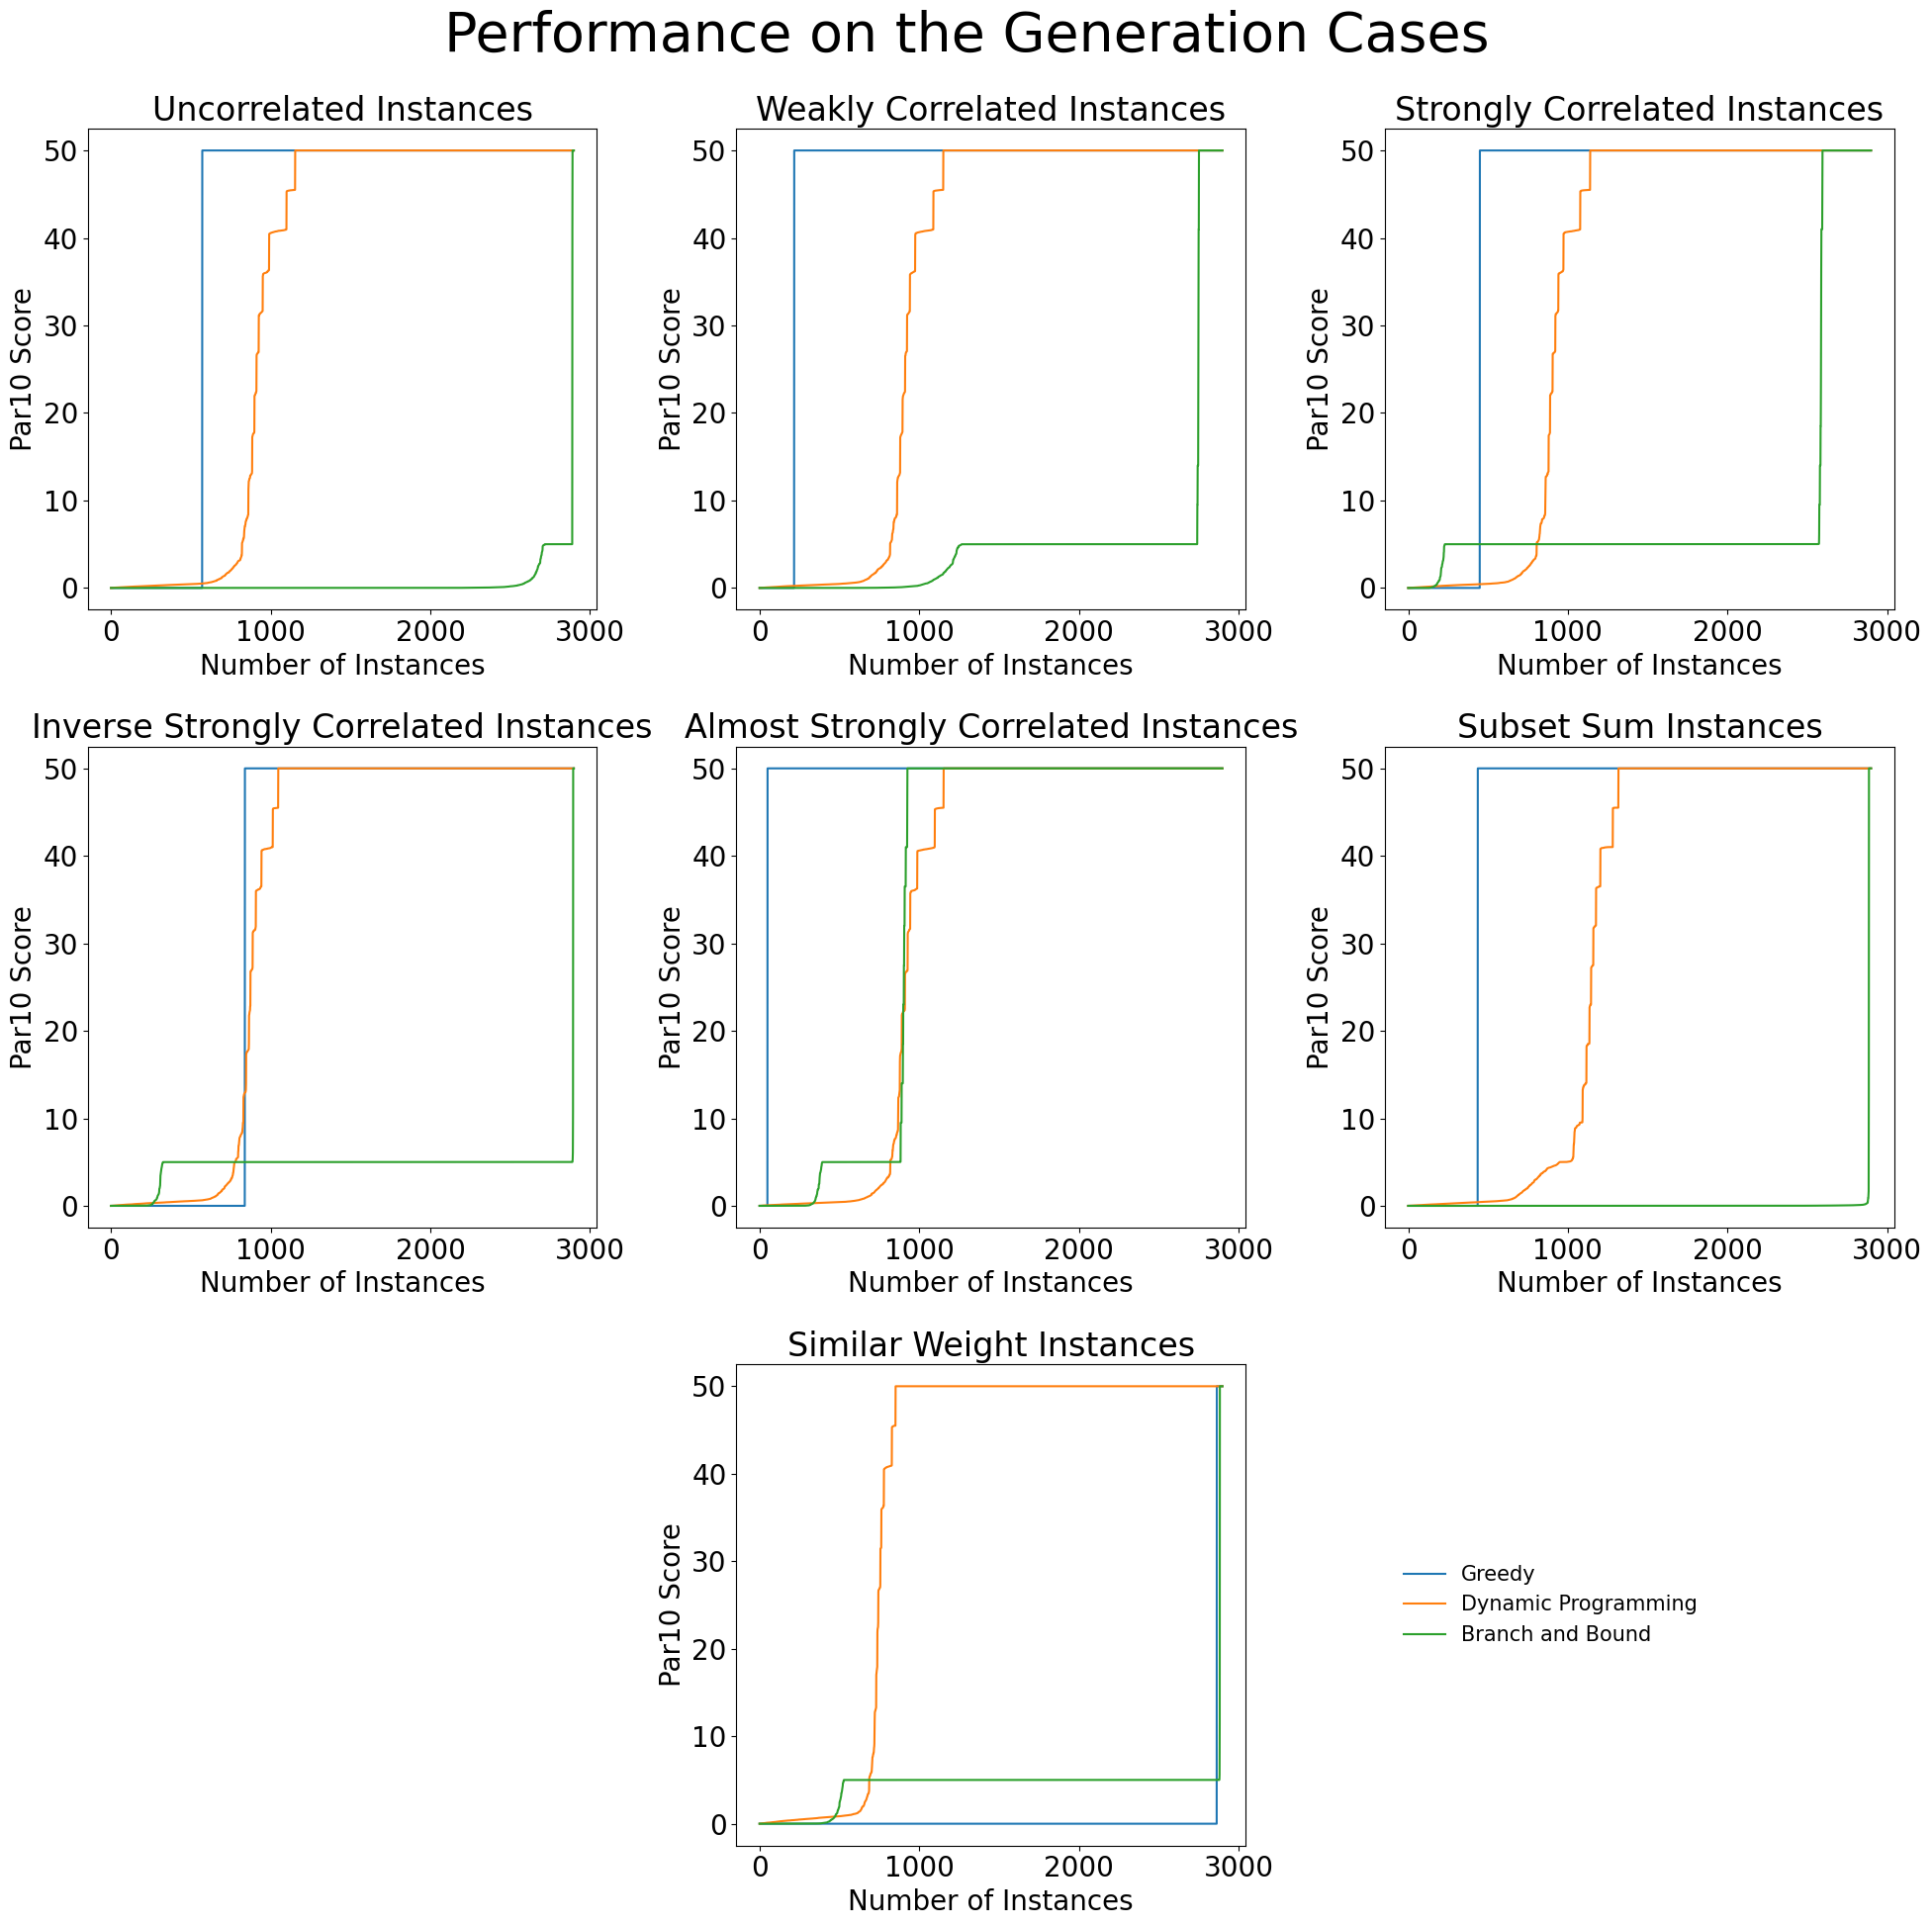

In [136]:
#Graph to inspect the algorithm's performance for each instance class
%matplotlib inline

#Dictionary to save the graphs
dict = {}

#Iterate over algorithms
for algorithm in ["greedy", "dynamic_programming", "branch_and_bound"]:  
    #Iterate over the seven generation cases
    for i in [1,2,3,4,5,6,9]: 
        #Load the data for the algorithm and instance class and save it into the dictionary
        column = pd.DataFrame(scores[algorithm])
        rows = column[column.index.str.startswith("knapPI_"+str(i))] #Instance class defined in index
        rows = rows.sort_values(algorithm, ascending=True)
        rows = rows.reset_index(drop=True)
        dict[algorithm, i] = rows

#Create a figure with 9 subplots in a 3x3 grid
#For better naming, their names are NOT sorted and the last row is defined as ax7, ax9, ax8
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax9, ax8)) = plt.subplots(3, 3, figsize=(20, 20))

#Plot the lines from the dictionary in the subplots
#Iterate over each algorithm
for algorithm, algorithm_name in [("greedy", "Greedy"), ("dynamic_programming", "Dynamic Programming"), ("branch_and_bound", "Branch and Bound")]:
    #Add the algorithm to each of the seven plots. The scores are devided by 1,000 to decrease the space for labels
    ax1.plot(dict[algorithm, 1][algorithm]/1000, label=algorithm_name)
    ax2.plot(dict[algorithm, 2][algorithm]/1000, label=algorithm_name)
    ax3.plot(dict[algorithm, 3][algorithm]/1000, label=algorithm_name)
    ax4.plot(dict[algorithm, 4][algorithm]/1000, label=algorithm_name)
    ax5.plot(dict[algorithm, 5][algorithm]/1000, label=algorithm_name)
    ax6.plot(dict[algorithm, 6][algorithm]/1000, label=algorithm_name)
    ax9.plot(dict[algorithm, 9][algorithm]/1000, label=algorithm_name)

#Add the titles to the subplots
ax1.set_title("Uncorrelated Instances")
ax2.set_title("Weakly Correlated Instances")
ax3.set_title("Strongly Correlated Instances")
ax4.set_title("Inverse Strongly Correlated Instances")
ax5.set_title("Almost Strongly Correlated Instances")
ax6.set_title("Subset Sum Instances")
ax9.set_title("Similar Weight Instances")

#Set x-label and y-label for each subplot
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    ax.set_xlabel("Number of Instances")
    ax.set_ylabel("Par10 Score")

#Use ax8 as legend
handles, labels = ax1.get_legend_handles_labels() #Equal across the subplots
ax8.legend(handles, labels, loc="center", mode="expand", fontsize=15, framealpha=0)
#Remove the axis from ax8
ax8.set_axis_off()

#Get rid of unused subplot
ax7.set_visible(False)

# increase font size of all text in the figure
plt.rcParams.update({'font.size': 22})

#Set the title and adjust the layout of the subplots and show the figure
fig.suptitle('Performance on the Generation Cases', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

#Increase the resolution and save the figure
plt.rcParams['savefig.dpi'] = 500
plt.savefig("figures/performance_on_the_generation_classes.png")
plt.show()

In [57]:
#Scores of the reduced data
#Read scores
scores = pd.DataFrame(pd.read_csv("AAS/scores.csv", header=0, index_col=0))
scores = scores.rename(columns={"dynamic_programming_bellman_array":"dynamic_programming", "branch_and_bound_sort": "branch_and_bound"})

#Calculation of VBS
scores["best_solver"] = scores.min(axis=1)

#Amount of solved instances
print("Total instances: " + str(len(scores.index)))

#Calculate scores for the algorithms, SBS and VBS
reduced_average_greedy, reduced_average_dynamic_programming, reduced_average_branch_and_bound, reduced_average_best_solver = scores.mean(axis=0)
reduced_average_single_best_solver = min(reduced_average_greedy, reduced_average_dynamic_programming, reduced_average_branch_and_bound)

#Output the scores
print("Average time of Greedy Algorithm: " + str(reduced_average_greedy))
print("Average time of Dynamic Programming Algorithm: " + str(reduced_average_dynamic_programming))
print("Average time Branch and Bound Algorithm: " + str(reduced_average_branch_and_bound))
print("Average time of Single Best Solver (Branch and Bound): " + str(reduced_average_single_best_solver))
print("Average time of Virtual Best Solver: " + str(reduced_average_best_solver))

#Amount of instances best solved with the particular algorithm
scores["best_algorithm"] = scores.idxmin(axis=1)
print(scores["best_algorithm"].value_counts())

Total instances: 18633
Average time of Greedy Algorithm: 35437.129358128055
Average time of Dynamic Programming Algorithm: 32675.360453496487
Average time Branch and Bound Algorithm: 4862.883819567433
Average time of Single Best Solver (Branch and Bound): 4862.883819567433
Average time of Virtual Best Solver: 1931.679520206086
branch_and_bound       10938
greedy                  5427
dynamic_programming     2268
Name: best_algorithm, dtype: int64


In [58]:
#Table of best performing algorithms on the seven reduced subsets of the data
#Display for table visualization
from IPython.display import display

#DataFrame with table values
performance_table = pd.DataFrame()
for i in [1,2,3,4,5,6,9]: #Iterate over classes 
    #Relevant column from the scores DataFrame
    col = pd.DataFrame(scores["best_algorithm"]) 
    #Only consider the indices that belong to the certain class
    col = col[col.index.str.startswith("knapPI_"+str(i))] 
    newcol = pd.DataFrame(columns=[str(i)])
    for algorithm in ["greedy", "dynamic_programming", "branch_and_bound"]: #Iterate over algorithms  
        count = int((col == algorithm).sum()) #Amount of instances of the class, best solved with the particular algorithm
        newcol.at[algorithm, str(i)] = count #Write the amount to the DataFrame
    #Add a row for the total amount of instances solved
    newcol.at["total", str(i)] = len(col.index)
    
    #Append the new column (representing the instance) to the table
    performance_table = pd.concat([performance_table, newcol], axis = 1)
    
#Rename the table header from the class id to the class name 
performance_table = performance_table.rename(columns={"1":"uncorrelated", "2":"weakly_correlated", "3":"strongly_correlated", "4":"inverse_strongly_correlated", "5":"almost_strongly_correlated", "6":"subset_sum", "9":"similar_weights"})
#Show the table
display(performance_table)

,uncorrelated,weakly_correlated,strongly_correlated,inverse_strongly_correlated,almost_strongly_correlated,subset_sum,similar_weights
greedy,572,217,449,839,50,436,2864
dynamic_programming,104,506,375,329,942,4,8
branch_and_bound,2219,2075,1778,1732,667,2450,17
total,2895,2798,2602,2900,1659,2890,2889


In [59]:
#Second table that shows the percentage of instances best solved per algorithm
for column in performance_table: #Iterate over the instance classes in the previous table
    for algorithm in ["greedy", "dynamic_programming", "branch_and_bound"]: #Iterate over the algorithms
        #Divide the amount of instances by the total amount of instances for the class and multiply by 100 for the percentage
        performance_table.at[algorithm, column] = performance_table.at[algorithm, column]/performance_table.at["total", column]*100
        
        #Round the values and add a % symbol for visualization
        performance_table.at[algorithm, column] = str(round(performance_table.at[algorithm, column],2))+"%"
        
#Show the table
display(performance_table)

,uncorrelated,weakly_correlated,strongly_correlated,inverse_strongly_correlated,almost_strongly_correlated,subset_sum,similar_weights
greedy,19.76%,7.76%,17.26%,28.93%,3.01%,15.09%,99.13%
dynamic_programming,3.59%,18.08%,14.41%,11.34%,56.78%,0.14%,0.28%
branch_and_bound,76.65%,74.16%,68.33%,59.72%,40.2%,84.78%,0.59%
total,2895,2798,2602,2900,1659,2890,2889


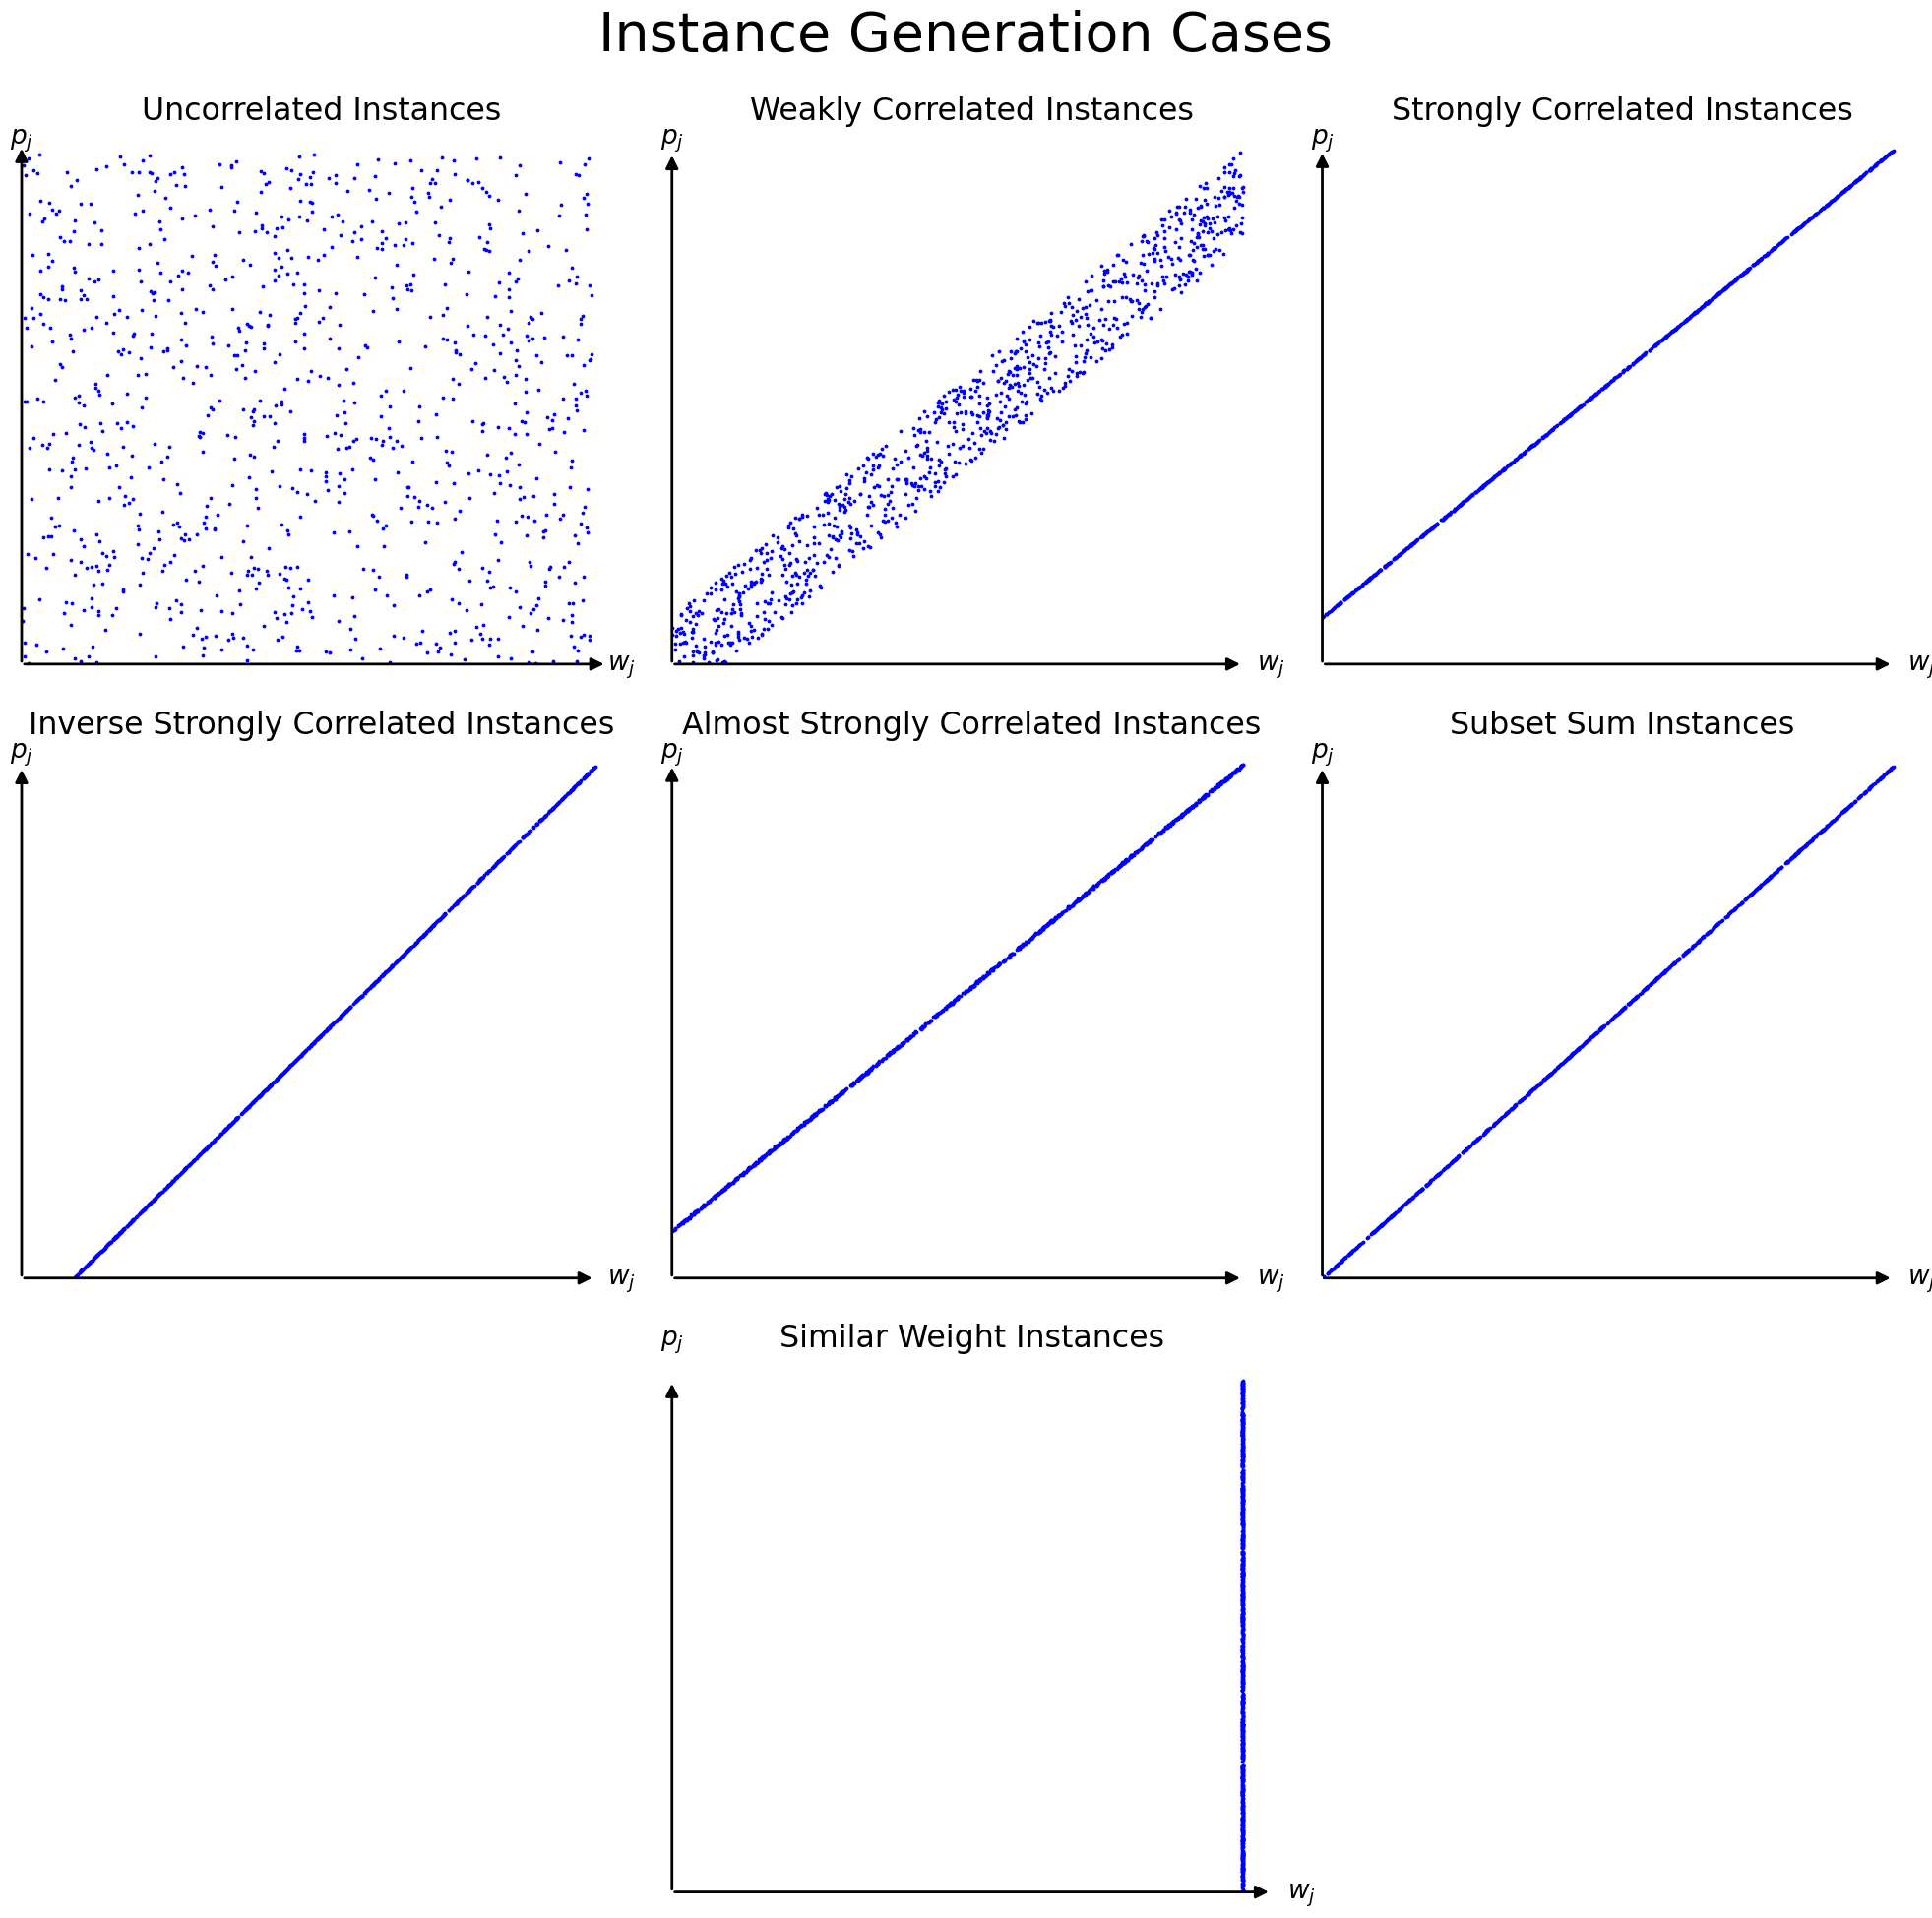

In [114]:
#Graph to illustrate instance cases

#Function to read the profit given the line of the instance
def read_profit(line):
    line = str(line)
    
    #Remove the first attribute (id)
    line = line[(line.find(",")+1):]
    
    #Remove everything after the end of the value
    line = line[:line.find(",")]
    
    #Return the value as integer
    return int(line)

#Function to read the weight given the line of the instance
def read_weight(line):
    line = str(line)
    
    #Remove the first two attributes (id, profit)
    line = line[(line.find(",")+1):]
    line = line[(line.find(",")+1):]
    
    #Only return the single value as integer
    line = line[:line.find(",")]
    return int(line)

#Function to create a DataFrame containing the profit and weight of each item given the lines (of items) of the instance file
def build_items(items):
    
    #For every item
    for index in items.index:
        
        #Read profit and weight
        profit = read_profit(items[0][index])
        weight = read_weight(items[0][index])
        
        #Write profit and weight to the DataFrame
        items.at[index, "profit"] = profit
        items.at[index, "weight"] = weight
    
    #Return a DataFrame that consists of the two columns
    return pd.concat([items["profit"], items["weight"]], axis=1)

#Create a figure with 9 subplots in a 3x3 grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

#Iterate over each axis and set the spines invisible
for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

#For each instance generation class
for i in range(7): 
    #Change the index i in case of class 9
    if i==6:
        i=8 #case 9
        
    #Select the instance to plot (First generation with Range 1,000 for each class)
    filepath = "knapPI_"+str(i+1)+"_1000_1000_1.csv"
    
    #Read the instance and create a DataFrame containing the columns profit and weight
    with open("knapsacksolver/dataset/"+str(filepath)) as file:
        lines = file.readlines()
    items = pd.DataFrame(lines[5:])
    items = build_items(items)
    
    #Select the title for the subplot
    match i:
        case 0: title = "Uncorrelated Instances"
        case 1: title = "Weakly Correlated Instances"
        case 2: title = "Strongly Correlated Instances"
        case 3: title = "Inverse Strongly Correlated Instances"
        case 4: title = "Almost Strongly Correlated Instances"
        case 5: title = "Subset Sum Instances"
        case 8: title = "Similar Weight Instances"
        case _: pass
        
    #Calculate the row and column index for the subplot
    if i==8: #In case of class 9
        i=7  #To be shown in in center of the last row
    row_index = i // 3
    col_index = i % 3
    
    #Scatterplot on the appropriate subplot
    axs[row_index, col_index].scatter(items["weight"], items["profit"], alpha = 1, color="b", s=3)
    
    #Set the title and labels
    axs[row_index, col_index].set_title(title)
    axs[row_index, col_index].set_xlabel("$w_j$")
    axs[row_index, col_index].set_ylabel("$p_j$", rotation=0)
     
    #Add arrows to the subplot
    if not (i == 0 or i == 7): #Arrows for these instances are set individually
        
        #Arrow to represent the y-axis
        axs[row_index, col_index].annotate("", xy=(0, items["profit"].max()), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
        
        #Arrow to represent the x-axis
        axs[row_index, col_index].annotate("", xy=(items["weight"].max(), 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
        
    # move the labels to the end of the y-axis
    axs[row_index, col_index].yaxis.set_label_coords(0, 0.95)
    axs[row_index, col_index].xaxis.set_label_coords(1, 0.02)
    
    #Set axis limits and remove the ticks
    axs[row_index, col_index].set_xlim(0)
    axs[row_index, col_index].set_ylim(0)
    axs[row_index, col_index].set_xticks([])
    axs[row_index, col_index].set_yticks([])

#Individual label cords and arrows for class 9 (As some items are displayed outside the graph)
axs[2, 1].xaxis.set_label_coords(1.05, 0.02)
axs[2, 1].annotate("", xy=(0, items["profit"].max()), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
axs[2, 1].annotate("", xy=(items["weight"].max()+50, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
axs[2, 1].set_xlim(0, items["weight"].max() + 50)
axs[2, 1].xaxis.set_label_coords(1.05, 0.02)
axs[2, 1].yaxis.set_label_coords(0, 1)

#Individual label cords and arrows for class 1 (As some items are displayed outside the graph)
axs[0, 0].annotate("", xy=(0, items["profit"].max()+15), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
axs[0, 0].annotate("", xy=(items["weight"].max()+25, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="-|>", linewidth=2, color="k"))
axs[0, 0].set_xlim(0, items["weight"].max() + 50)
axs[0, 0].set_ylim(0, items["weight"].max() + 50)

#Hide empty subplots
axs[2, 0].set_visible(False)
axs[2, 2].set_visible(False)

#Increase font size of all texts
plt.rcParams.update({'font.size': 19})

#Adjust the layout of the subplots and set title
fig.suptitle('Instance Generation Cases', fontsize=40)
fig.tight_layout()
fig.subplots_adjust(top=0.92)

#Increase resolution and save the figure
plt.rcParams['savefig.dpi'] = 500
plt.savefig("figures/instance_generation_cases.png")
plt.show()